In [1]:
from bayes_opt import BayesianOptimization
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow import keras
import os
import sys
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as trt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 



from keras.utils import to_categorical

from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#!pip install bayesian-optimization

# Gathering German Traffic Sign Dataset 

In [ ]:
## Downloading Dataset
import urllib.request

print('Beginning file download...')

url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'

urllib.request.urlretrieve(url, './traffic-signs-data.zip')

In [ ]:
## Unizping Dataset
import zipfile
import os


print('Beginning file unzip')

zip_ref = zipfile.ZipFile('./traffic-signs-data.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

print('Done')


In [4]:
import pickle
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

In [6]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [7]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)

In [9]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of validation examples
n_validation = X_valid.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]
# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train[0])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


# CNN Model Training

In [10]:
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43
pool_size = (2,2)

# Bayesian Optimization

In [ ]:
def Black_Box(node0,node1,node2,node3,node4,node5,epochs,Drop0,Drop1,Drop2,Drop3,Drop4,Drop5,batch_size,LR):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(int(node0), (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))

    model.add(keras.layers.Conv2D(int(node1), (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(int(Drop0)))



    model.add(keras.layers.Conv2D(int(node2), (3, 3), activation='relu', padding='same'))

    model.add(keras.layers.Conv2D(int(node3), (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(int(Drop1)))

    model.add(keras.layers.Conv2D(int(node4), (3, 3), activation='relu', padding='same'))

    model.add(keras.layers.Conv2D(int(node5), (3, 3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(keras.layers.Dropout(int(Drop2)))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=hidden_num_units, activation='relu'))
    model.add(keras.layers.Dropout(int(Drop3)))

    model.add(keras.layers.Dense(units=hidden_num_units1, activation='relu'))
    model.add(keras.layers.Dropout(int(Drop4)))

    model.add(keras.layers.Dense(units=hidden_num_units2, activation='relu'))
    model.add(keras.layers.Dropout(int(Drop5)))

    model.add(keras.layers.Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'))
    
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=LR), metrics=['accuracy'])
    trained_model_conv = model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), validation_data=(X_valid, y_valid),verbose=1)
    percentage=model.evaluate (X_train,y_train)[1]*100
    

    return percentage


In [ ]:
bounds={'node0':(64,128),
        'node1':(64,128),
        'node2':(32,128),
        'node3':(16,64),
        'node4':(16,64),
        'node5':(16,32),
        'epochs':(10,20),
         'Drop0':(0.1,0.5),
         'Drop1':(0.1,0.5),
         'Drop2':(0.1,0.5),
         'Drop3':(0.1,0.5),
         'Drop4':(0.1,0.5),
         'Drop5':(0.1,0.5),
         'batch_size':(100,400),
         'LR':(0.0005,0.0002)
       }

In [ ]:
optimizer = BayesianOptimization(
    f=Black_Box,
    pbounds=bounds,
    random_state=1
)


In [ ]:
logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

In [ ]:
optimizer.maximize(n_iter=6)

# No bayesian optimization

In [16]:
epochs = 13
batch_size = 250
pool_size = (2,2)
input_shape = Input(shape=(32, 32,3))

In [17]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(98, (3, 3), activation='relu', input_shape=(32,32,3), padding='same'))

model.add(keras.layers.Conv2D(90, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
model.add(keras.layers.Dropout(0.3))
          

          
model.add(keras.layers.Conv2D(97, (3, 3), activation='relu', padding='same'))

model.add(keras.layers.Conv2D(25, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
model.add(keras.layers.Dropout(0.1))
    
model.add(keras.layers.Conv2D(58, (3, 3), activation='relu', padding='same'))

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
          
model.add(keras.layers.Dense(units=hidden_num_units, activation='relu'))
model.add(keras.layers.Dropout(0.1))
          
model.add(keras.layers.Dense(units=hidden_num_units1, activation='relu'))
model.add(keras.layers.Dropout(0.1))
          
model.add(keras.layers.Dense(units=hidden_num_units2, activation='relu'))
model.add(keras.layers.Dropout(0.1))
          
model.add(keras.layers.Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'))


In [18]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])
trained_model_conv = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),verbose=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/13
34799/34799 [==============================] - 283s 8ms/sample - loss: 3.3812 - acc: 0.1318 - val_loss: 2.8002 - val_acc: 0.2957
Epoch 2/13
34799/34799 [==============================] - 291s 8ms/sample - loss: 2.2723 - acc: 0.3751 - val_loss: 1.7663 - val_acc: 0.5424
Epoch 3/13
34799/34799 [==============================] - 262s 8ms/sample - loss: 1.5529 - acc: 0.5480 - val_loss: 1.0820 - val_acc: 0.7429
Epoch 4/13
34799/34799 [==============================] - 260s 7ms/sample - loss: 1.0441 - acc: 0.6905 - val_loss: 0.7574 - val_acc: 0.8075
Epoch 5/13
34799/34799 [==============================] - 261s 7ms/sample - loss: 0.7353 - acc: 0.7803 - val_loss: 0.5854 - val_acc: 0.8549
Epoch 6/13
34799/34799 [==============================] - 259s 7ms/sample - loss: 0.5594 - acc: 0.8349 - val_loss: 0.4633 - val_acc: 0.8866
Epoch 7/13
34799/34799 [==============================] - 257s 7ms/sample - loss: 0.4374 - acc: 0.8715 - val_lo

# Plot of the learning history of the trained CNN model 

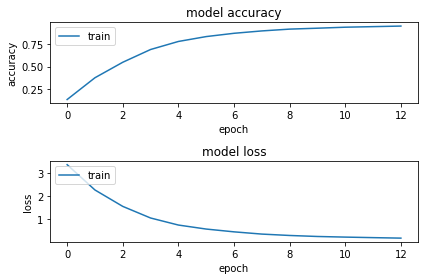

In [19]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(trained_model_conv.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(trained_model_conv.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
score=model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])


12630/12630 [==============================] - 26s 2ms/sample - loss: 0.1958 - acc: 0.9430
loss: 0.1957872733273208
accuracy: 0.94299287


In [24]:
Labels=pd.read_csv("signnames.csv")["SignName"]


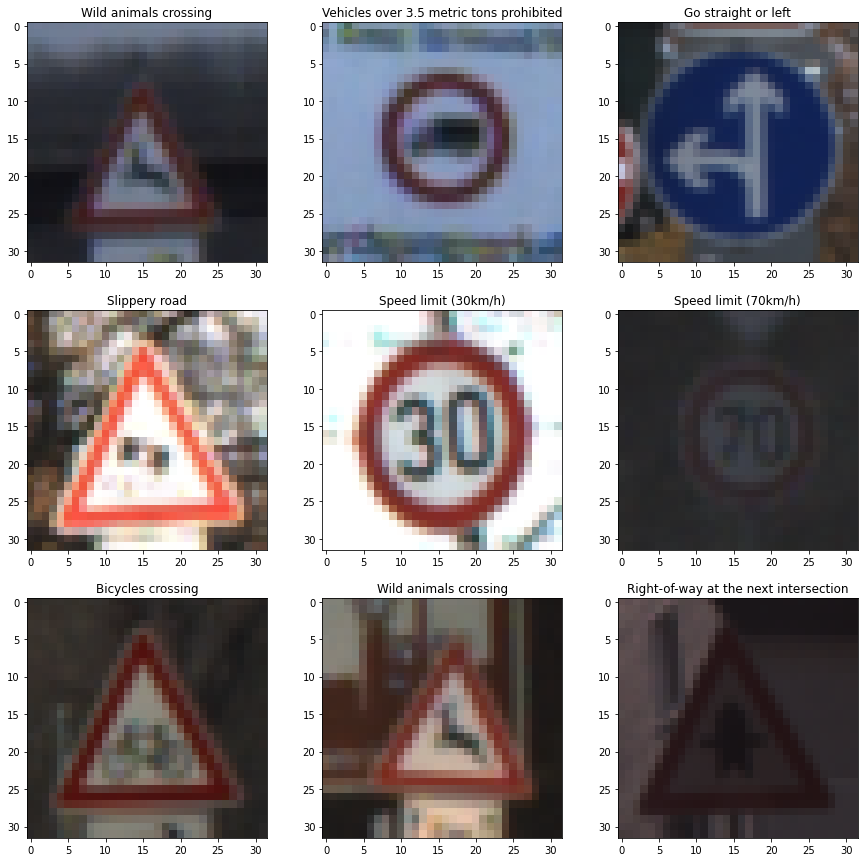

In [25]:
# A prediction of the testing data
fig,ax=plt.subplots(3,3,figsize=(15,15))
for row in ax:
    for col in row:
        ind=np.random.randint(0,len(X_test))
        col.imshow(np.asarray(X_train[ind]))
        col.title.set_text(Labels[np.argmax(model.predict(np.asarray([X_train[ind]])))])

# Useful Articles
- https://github.com/tomaszkacmajor/CarND-Traffic-Sign-Classifier-P2/blob/master/Traffic_Sign_Classifier.ipynb
- https://medium.com/typeiqs/traffic-sign-recognition-aa38d699ac9 
- https://medium.com/@sdoshi579/convolutional-neural-network-learn-and-apply-3dac9acfe2b6
- https://towardsdatascience.com/traffic-sign-detection-using-convolutional-neural-network-660fb32fe90e    
    